<a href="https://colab.research.google.com/github/HyTran312/DoAnNganh/blob/main/DAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAN/historical_air_quality_2021_vi.csv') # Đường dẫn tới file csv trong Google Drive
new_file1 = file[file['Tên trạm'] == 'Ho Chi Minh City US Consulate, Vietnam (Lãnh sự quán Hoa Kỳ, Hồ Chí Minh)']
new_file1.drop(["Chỉ số AQI", "Vị trí", "Url", "Mã trạm", "Chất ô nhiễm chủ đạo", "Trạng thái cảnh báo", "Mức độ cảnh báo", "Múi giờ"], axis=1, inplace=True)
new_file1.replace('-', np.nan, inplace=True)
new_file1.dropna(axis=1, how='any', inplace=True)
new_file1['Thời gian cập nhật'] = pd.to_datetime(new_file1['Thời gian cập nhật'])
new_file1 = new_file1.sort_values(by='Thời gian cập nhật')

new_file1

<ipython-input-2-34acf46e7e07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file1.drop(["Chỉ số AQI", "Vị trí", "Url", "Mã trạm", "Chất ô nhiễm chủ đạo", "Trạng thái cảnh báo", "Mức độ cảnh báo", "Múi giờ"], axis=1, inplace=True)
<ipython-input-2-34acf46e7e07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file1.replace('-', np.nan, inplace=True)
<ipython-input-2-34acf46e7e07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Tên trạm,Sương,Độ ẩm,Áp suất,Bụi PM2.5,Nhiệt độ,Tốc độ gió,Thời gian cập nhật
0,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",0.0,83.0,"1,009.00",102.00,27.0,3.6,2021-01-21 19:00:00
23,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",0.0,56.5,"1,008.50",122.00,30.5,2.5,2021-01-22 13:00:00
46,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",0.0,49.0,"1,007.00",114.00,32.0,1.5,2021-01-23 15:00:00
69,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",0.0,74.0,"1,009.00",80.00,27.0,4.1,2021-01-25 19:00:00
92,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",0.0,62.0,"1,007.00",137.00,31.0,5.1,2021-01-26 16:00:00
...,...,...,...,...,...,...,...,...
2507,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",24.0,66.0,"1,010.00",97.00,31.0,2.8,2021-11-10 10:00:00
2530,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",24.0,66.0,"1,008.50",65.00,31.0,3.6,2021-11-16 12:00:00
2553,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",25.0,79.0,"1,009.00",114.00,29.0,1.5,2021-11-20 09:00:00
2576,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",20.5,69.0,"1,011.00",89.00,26.5,3.0,2021-11-26 09:00:00


In [ ]:
from numpy import float64
new_file1["Áp suất"] = new_file1["Áp suất"].str.replace(',', '').astype(float64)
new_file1["Bụi PM2.5"] = pd.to_numeric(new_file1["Bụi PM2.5"], errors='coerce')

new_file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tên trạm            114 non-null    object        
 1   Sương               114 non-null    float64       
 2   Độ ẩm               114 non-null    float64       
 3   Áp suất             114 non-null    float64       
 4   Bụi PM2.5           114 non-null    float64       
 5   Nhiệt độ            114 non-null    float64       
 6   Tốc độ gió          114 non-null    float64       
 7   Thời gian cập nhật  114 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.0+ KB


In [ ]:
new_file1.describe().round(3)

,Sương,Độ ẩm,Áp suất,Bụi PM2.5,Nhiệt độ,Tốc độ gió
count,114.000,114.000,114.000,114.000,114.000,114.000
mean,20.601,69.939,1008.513,67.886,29.781,3.067
std,8.469,16.513,2.343,28.135,2.575,1.610
min,0.000,30.000,1003.000,9.000,24.000,0.200
25%,20.625,59.000,1007.000,50.000,28.000,1.800
50%,24.000,73.500,1009.000,65.000,29.750,3.000
75%,25.500,83.000,1010.000,82.000,31.000,4.250
max,27.000,100.000,1013.000,156.000,35.000,6.900


In [ ]:
new_file = new_file1.copy()

new_file['Sương'] = ((new_file['Sương'] - new_file['Sương'].min()) / (new_file['Sương'].max() - new_file['Sương'].min())).round(3)
new_file['Độ ẩm'] = ((new_file['Độ ẩm'] - new_file['Độ ẩm'].min()) / (new_file['Độ ẩm'].max() - new_file['Độ ẩm'].min())).round(3)
new_file['Áp suất'] = ((new_file['Áp suất'] - new_file['Áp suất'].min()) / (new_file['Áp suất'].max() - new_file['Áp suất'].min())).round(3)
new_file['Bụi PM2.5'] = ((new_file['Bụi PM2.5'] - new_file['Bụi PM2.5'].min()) / (new_file['Bụi PM2.5'].max() - new_file['Bụi PM2.5'].min())).round(3)
new_file['Nhiệt độ'] = ((new_file['Nhiệt độ'] - new_file['Nhiệt độ'].min()) / (new_file['Nhiệt độ'].max() - new_file['Nhiệt độ'].min())).round(3)
new_file['Tốc độ gió'] = ((new_file['Tốc độ gió'] - new_file['Tốc độ gió'].min()) / (new_file['Tốc độ gió'].max() - new_file['Tốc độ gió'].min())).round(3)

new_file.drop(["Tên trạm"], axis = 1, inplace = True)

new_file

,Sương,Độ ẩm,Áp suất,Bụi PM2.5,Nhiệt độ,Tốc độ gió,Thời gian cập nhật
0,0.000,0.757,0.60,0.633,0.273,0.507,2021-01-21 19:00:00
23,0.000,0.379,0.55,0.769,0.591,0.343,2021-01-22 13:00:00
46,0.000,0.271,0.40,0.714,0.727,0.194,2021-01-23 15:00:00
69,0.000,0.629,0.60,0.483,0.273,0.582,2021-01-25 19:00:00
92,0.000,0.457,0.40,0.871,0.636,0.731,2021-01-26 16:00:00
...,...,...,...,...,...,...,...
2507,0.889,0.514,0.70,0.599,0.636,0.388,2021-11-10 10:00:00
2530,0.889,0.514,0.55,0.381,0.636,0.507,2021-11-16 12:00:00
2553,0.926,0.700,0.60,0.714,0.455,0.194,2021-11-20 09:00:00
2576,0.759,0.557,0.80,0.544,0.227,0.418,2021-11-26 09:00:00


In [ ]:
import pandas as pd
import seaborn as sns #Đây là thư viện để tạo ma trận biểu đồ
import os #Đây là thư viện để tương tác với thư mục

output_directory = '/content/drive/MyDrive/Colab Notebooks/DAN' #Đường dẫn đến thư mục sẽ lưu hình ảnh

#Tạo ma trận biểu đồ
sns.set(style="ticks")

for index, row in new_file.iterrows():
  data = pd.DataFrame(row[['Sương', 'Độ ẩm', 'Áp suất', 'Bụi PM2.5', 'Nhiệt độ', 'Tốc độ gió']]).T
  scatter_plot = sns.pairplot(data)
  image_filename = os.path.join(output_directory, f'scatter_{index}.png')
  scatter_plot.fig.savefig(image_filename)
  scatter_plot.fig.clf()



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1274: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import os
import glob #Đây là thư viện để tương tác với tệp tin

# Đường dẫn đến thư mục chứa các tệp hình ảnh
image_directory = '/content/drive/MyDrive/Colab Notebooks/DAN'

# Sử dụng glob để lấy danh sách các tệp hình ảnh trong thư mục
image_files = glob.glob(os.path.join(image_directory, '*.png'))


In [ ]:
import cv2 #Đây là thư viện xử lý hình ảnh và video
import numpy as np #Đây là thư viện xử lý mảng

#Tạo mảng
img_list = []

#Gọi từng hình ảnh trong danh sách các tệp hình ảnh ở trên, xử lý từng hình ảnh và lưu vào trong mảng
for img in image_files:
  img_real = img
  img_real = cv2.imread(img_real)
  img_real = cv2.resize(img_real, (200, 200))
  image_np = np.array(img_real)

  img_list.append(image_np)

#Lưu mảng
images_np = np.array(img_list)

#Kiểm tra kích thước mảng (Số lượng phần tử, chiều cao, chiều rộng, kênh)
print(images_np.shape)

(114, 200, 200, 3)


In [ ]:
X = images_np / 255.0 #Gọi X là mảng hình ảnh được chuyển về dạng số hóa sau khi chia cho 255.0
y = new_file['Bụi PM2.5'] #Gọi y là dữ liệu Bụi PM2.5

from sklearn.model_selection import train_test_split #Đây là thư viện để chia dữ liệu thành các tập huấn luyện và tập kiểm tra

#Sử dụng thư viện train_test_split để chia X và y thành tập huấn luyện và tập kiểm tra có tỷ lệ lần lượt là 80% và 20%
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=42)

#Kiểm tra tập huấn luyện và tập kiểm tra của cả X và y
print(X_train_cnn.shape)
print(X_test_cnn.shape)
print(len(y_train_cnn))
print(len(y_test_cnn))

(91, 200, 200, 3)
(23, 200, 200, 3)
91
23


In [ ]:
import tensorflow as tf #Đây là thư viện dành cho Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Xây dựng mô hình CNN
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(200, 200, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))  # Lớp đầu ra cho chất lượng không khí

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

#Huấn luyện mô hình
result_cnn = cnn_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=50, batch_size=64)

#Kiểm tra kết quả
print(result_cnn.history)

Epoch 1/50
2/2 [==============================] - 5s 2s/step - loss: 3812.8352 - val_loss: 648.4349
Epoch 2/50
2/2 [==============================] - 6s 2s/step - loss: 456.5388 - val_loss: 0.2224
Epoch 3/50
2/2 [==============================] - 4s 1s/step - loss: 0.1915 - val_loss: 0.2232
Epoch 4/50
2/2 [==============================] - 4s 1s/step - loss: 0.1921 - val_loss: 0.2238
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 0.1927 - val_loss: 0.2242
Epoch 6/50
2/2 [==============================] - 4s 1s/step - loss: 0.1931 - val_loss: 0.2246
Epoch 7/50
2/2 [==============================] - 4s 1s/step - loss: 0.1934 - val_loss: 0.2248
Epoch 8/50
2/2 [==============================] - 4s 2s/step - loss: 0.1936 - val_loss: 0.2251
Epoch 9/50
2/2 [==============================] - 5s 1s/step - loss: 0.1938 - val_loss: 0.2252
Epoch 10/50
2/2 [==============================] - 4s 1s/step - loss: 0.3891 - val_loss: 0.2254
Epoch 11/50
2/2 [=========================

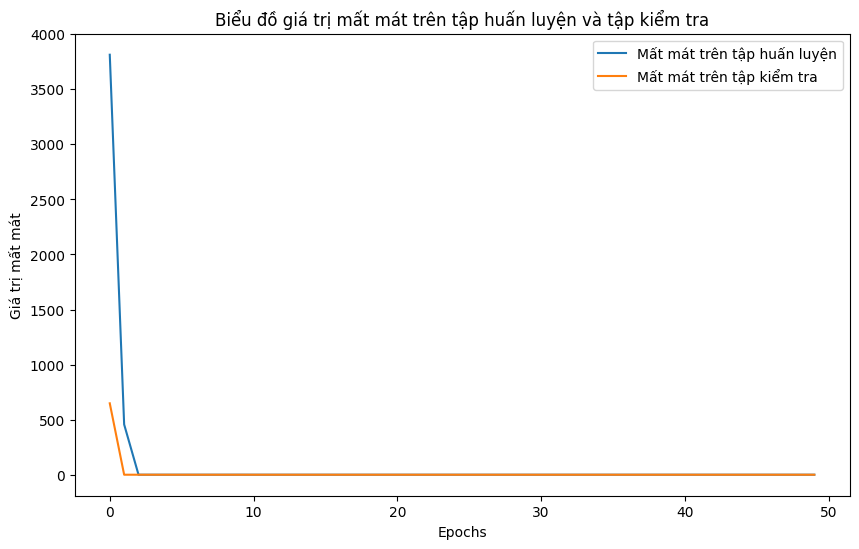

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin về giá trị mất mát trên tập huấn luyện và tập kiểm tra
train_loss_cnn = result_cnn.history['loss']
val_loss_cnn = result_cnn.history['val_loss']

# Vẽ biểu đồ giá trị mất mát
plt.figure(figsize=(10, 6))
plt.plot(train_loss_cnn, label='Mất mát trên tập huấn luyện')
plt.plot(val_loss_cnn, label='Mất mát trên tập kiểm tra')
plt.xlabel('Epochs')
plt.ylabel('Giá trị mất mát')
plt.legend()
plt.title('Biểu đồ giá trị mất mát trên tập huấn luyện và tập kiểm tra')
plt.show()

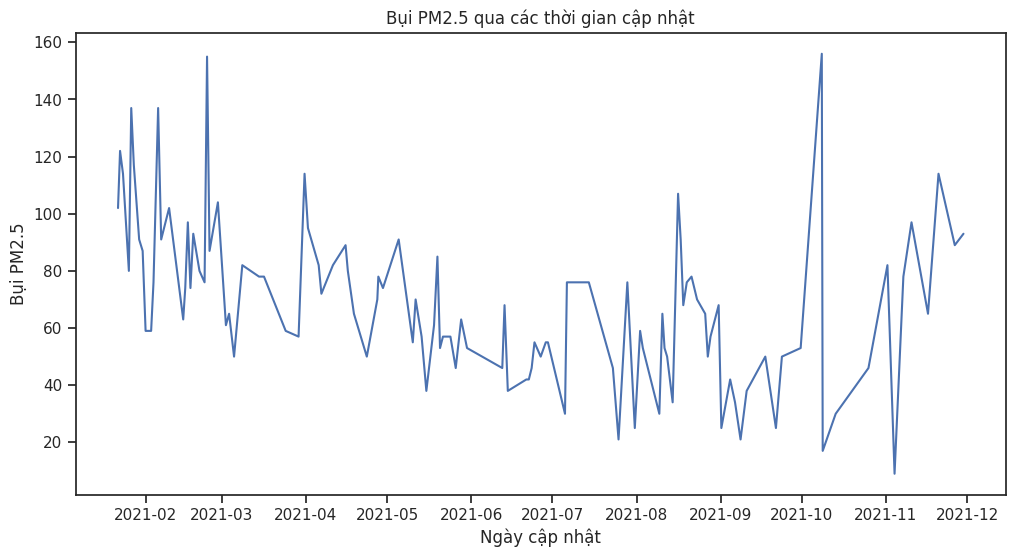

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(new_file1['Thời gian cập nhật'], new_file1['Bụi PM2.5'], linestyle='-', color='b')
plt.xlabel('Ngày cập nhật')
plt.ylabel('Bụi PM2.5')
plt.title('Bụi PM2.5 qua các thời gian cập nhật')

plt.savefig('Bụi PM25')
plt.show()

In [ ]:
new_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DAN/Bụi PM2.5/Bụi PM25.png')
new_image = cv2.resize(new_image, (200, 200))
new_data = np.array(new_image)
new_data = new_data / 255.0
new_data = np.expand_dims(new_data, axis=0)

prediction_cnn = cnn_model.predict(new_data)

print(prediction_cnn)

1/1 [==============================] - 0s 94ms/step
[[0.39632374]]


In [ ]:
unscaled_prediction_cnn = prediction_cnn * (new_file1['Bụi PM2.5'].max() - new_file1['Bụi PM2.5'].min()) + new_file1['Bụi PM2.5'].min()
print(unscaled_prediction_cnn)

[[67.25959]]


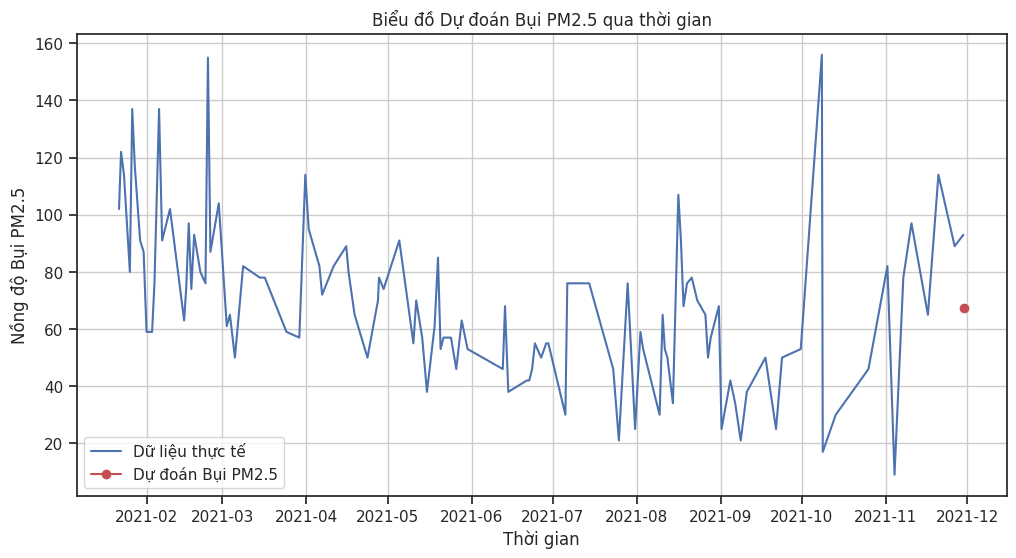

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# (Ở đây, bạn cần thay đổi phần này để tạo dãy thời gian cho các thời điểm bạn muốn dự đoán)
predicted_dates = pd.date_range(start='2021-11-30', periods=1, freq='3D')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(new_file1['Thời gian cập nhật'], new_file1['Bụi PM2.5'], linestyle='-', color='b', label='Dữ liệu thực tế')
plt.plot(predicted_dates, unscaled_prediction_cnn, marker='o', linestyle='-', color='r', label='Dự đoán Bụi PM2.5')
plt.title('Biểu đồ Dự đoán Bụi PM2.5 qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Nồng độ Bụi PM2.5')
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

new_file['Thời gian cập nhật'] = pd.to_datetime(new_file['Thời gian cập nhật'])
new_file['Thời gian cập nhật'] = new_file['Thời gian cập nhật'].astype(int) / 10**9

# Chuẩn bị dữ liệu và chia thành tập huấn luyện và tập kiểm tra
target_column = 'Bụi PM2.5'
X = new_file.drop(columns=[target_column]).values
y = new_file[target_column].values

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_lstm = X_train_lstm.astype('float32')
X_test_lstm = X_test_lstm.astype('float32')
y_train_lstm = y_train_lstm.astype('float32')
y_test_lstm = y_test_lstm.astype('float32')

# Xây dựng mô hình LSTM
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(10, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
result_lstm = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32)

print(result_lstm.history)

Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 0.1897
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1874
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1851
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1828
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1805
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1782
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1760
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1738
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1716
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1694
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1674
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1652
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0.

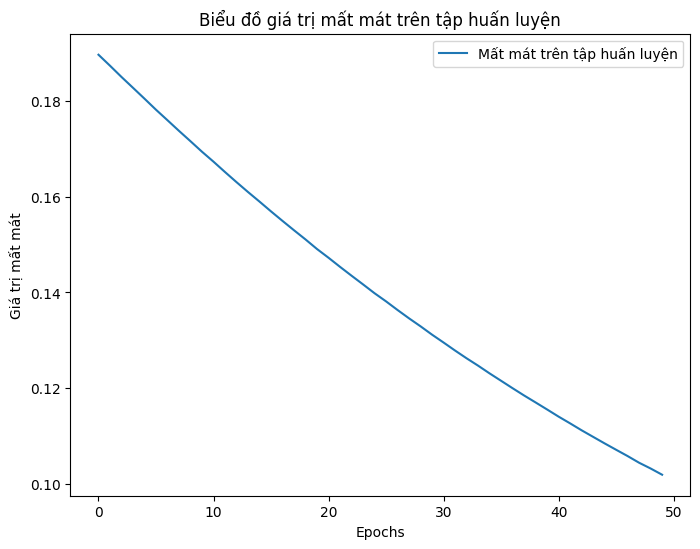

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin về giá trị mất mát trên tập huấn luyện và tập kiểm tra
train_loss_lstm = result_lstm.history['loss']

# Vẽ biểu đồ giá trị mất mát
plt.figure(figsize=(8, 6))
plt.plot(train_loss_lstm, label='Mất mát trên tập huấn luyện')
plt.xlabel('Epochs')
plt.ylabel('Giá trị mất mát')
plt.legend()
plt.title('Biểu đồ giá trị mất mát trên tập huấn luyện')
plt.show()

In [ ]:
# Dự đoán
prediction_lstm = lstm_model.predict(X_test_lstm)
print(prediction_lstm)

1/1 [==============================] - 0s 212ms/step
[[0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]
 [0.13752139]]


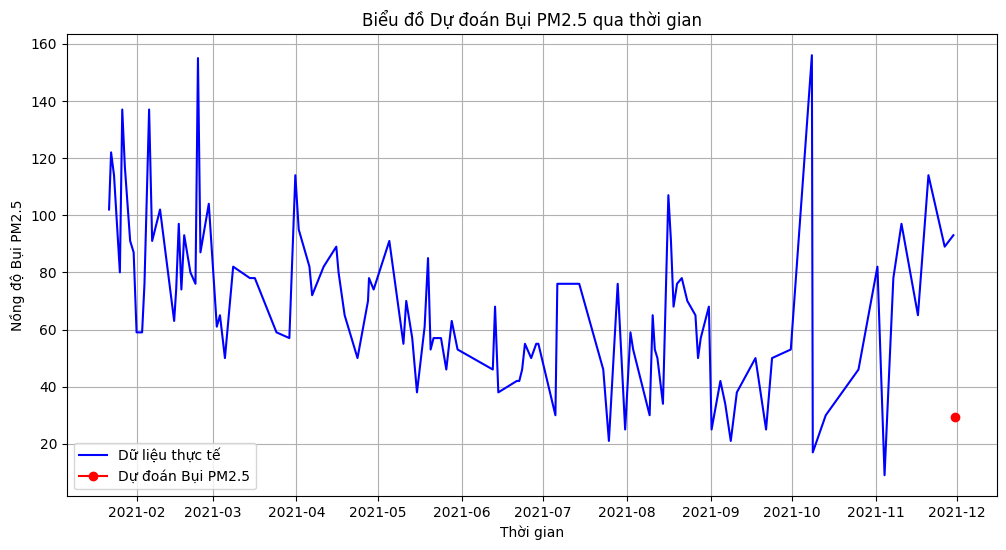

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

unscaled_prediction_lstm = prediction_lstm * (new_file1['Bụi PM2.5'].max() - new_file1['Bụi PM2.5'].min()) + new_file1['Bụi PM2.5'].min()
predicted_value = unscaled_prediction_lstm.mean()

predicted_dates = pd.date_range(start='2021-11-30', periods=1, freq='3D')

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(new_file1['Thời gian cập nhật'], new_file1['Bụi PM2.5'], linestyle='-', color='b', label='Dữ liệu thực tế')
plt.plot(predicted_dates, predicted_value, marker='o', linestyle='-', color='r', label='Dự đoán Bụi PM2.5')
plt.title('Biểu đồ Dự đoán Bụi PM2.5 qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Nồng độ Bụi PM2.5')
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error

predicted_values_cnn = cnn_model.predict(X_test_cnn)
predicted_values_lstm = lstm_model.predict(X_test_lstm)

mae_cnn = mean_absolute_error(y_test_cnn, predicted_values_cnn).round(3)
mae_lstm = mean_absolute_error(y_test_lstm, predicted_values_lstm).round(3)

mse_cnn = mean_squared_error(y_test_cnn, predicted_values_cnn).round(3)
mse_lstm = mean_squared_error(y_test_lstm, predicted_values_lstm).round(3)

rmse_cnn = np.sqrt(mse_cnn).round(3)
rmse_lstm = np.sqrt(mse_lstm).round(3)

mape_cnn = (mae_cnn / np.mean(np.abs(y_test_cnn))).round(3)
mape_lstm = (mae_lstm / np.mean(np.abs(y_test_lstm))).round(3)

data = {
    'Model': ['CNN', 'LSTM'],
    'MAE': [mae_cnn, mae_lstm],
    'MSE': [mse_cnn, mse_lstm],
    'RMSE': [rmse_cnn, rmse_lstm],
    'MAPE': [mape_cnn, mape_lstm]
}

comparison_df = pd.DataFrame(data)

print(comparison_df)

1/1 [==============================] - 0s 24ms/step
  Model    MAE    MSE   RMSE   MAPE
0   CNN  0.428  0.224  0.473  1.007
1  LSTM  0.290  0.124  0.352  0.683
